In [65]:
!pip install snscrape

In [66]:
! pip install celluloid

In [67]:
!pip install afinn

In [68]:
!pip install wordcloud

In [1]:
import snscrape.modules.twitter as scpt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from celluloid import Camera

pd.set_option("display.max_colwidth", -1)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_4740/4039600272.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


# scraper les données 

In [2]:
def pretty(d, indent=0):
    for key, value in d.items():
      print('\t' * indent + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))

In [ ]:
# query ="(#Ukraine) since:2022-02-24"

# tweets = []
# limits =10000
# limit_add=50

# for tweet in scpt.TwitterSearchScraper(query).get_items():

#     print(vars(tweet)) 
#     if len(tweets)==limits :
#         break
#     if len(tweets)==limit_add :
#         df = pd.DataFrame(tweets, columns = ['Date','Username','displayname','UserDescription','followersCount','friendsCount','statusesCount','favouritesCount',
#                                         'listedCount','mediaCount','location','content','replyCount','retweetCount','likeCount','quoteCount','lang','hashtags'])
#         df.to_csv('sentiments_uk.csv', mode='a', header=False)
#         tweets = []
#     else:
#         tweets.append([tweet.date, tweet.user.username,tweet.user.displayname,tweet.user.description,tweet.user.followersCount,tweet.user.friendsCount,
#                     tweet.user.statusesCount,tweet.user.favouritesCount,tweet.user.listedCount,tweet.user.mediaCount,tweet.user.location,tweet.content,
#                     tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.lang,tweet.hashtags])
    


### Methode 2 Scraping

In [ ]:
#snscrape --jsonl --progress --max-results 1000000 --since 2021-01-01 twitter-search "(#Ukraine) since:2022-02-24" > tweets_uk.json

In [ ]:
df=pd.read_json("tweets_uk.json",lines=True)

In [148]:
username=[]
displayname=[]
description=[]
created=[]
location=[]
mediaCount=[]
listedCount=[]
favouritesCount=[]
statusesCount=[]
friendsCount=[]
followersCount=[]

for user in df.user:
    
    username.append(user['username'])
    displayname.append(user['displayname'])
    description.append(user['description'])
    created.append(user['created'])
    location.append(user['location'])
    mediaCount.append(user['mediaCount'])
    listedCount.append(user['listedCount'])
    favouritesCount.append(user['favouritesCount'])
    statusesCount.append(user['statusesCount'])
    friendsCount.append(user['friendsCount'])
    followersCount.append(user['followersCount'])
df['username']=username
df['displayname']=displayname
df['description']=description
df['created']=created
df['mediaCount']=mediaCount
df['listedCount']=listedCount
df['favouritesCount']=favouritesCount
df['statusesCount']=statusesCount
df['friendsCount']=friendsCount
df['followersCount']=followersCount
df['location']=location

df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,displayname,description,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location
0,snscrape.modules.twitter.Tweet,https://twitter.com/jmAlric11/status/1523785209573003270,2022-05-09 22:01:19+00:00,Excellente analyse Pape François👉l’#OTAN a peut-être provoqué l’offensive #russe 👉Comme en #Syrie #Irak #Yemen ce sont les intérêts occidentaux qui alimentent les guerres👉S’oppose aux livraisons d’armes à #Ukraine👉veut rencontre #Poutine pour la paix👍 https://t.co/xzIyVvnzau,Excellente analyse Pape François👉l’#OTAN a peut-être provoqué l’offensive #russe 👉Comme en #Syrie #Irak #Yemen ce sont les intérêts occidentaux qui alimentent les guerres👉S’oppose aux livraisons d’armes à #Ukraine👉veut rencontre #Poutine pour la paix👍 lanouvelletribune.info/2022/05/ukrain…,1523785209573003270,"{'_type': 'snscrape.modules.twitter.User', 'username': 'jmAlric11', 'id': 480752391, 'displayname': 'Jean-Marc Alric', 'description': 'Ex (admin.Anticor-Collaborateur Cabinet) alric.jeanmarc@yahoo.fr', 'rawDescription': 'Ex (admin.Anticor-Collaborateur Cabinet) alric.jeanmarc@yahoo.fr', 'descriptionUrls': None, 'verified': False, 'created': '2012-02-01T21:16:53+00:00', 'followersCount': 28882, 'friendsCount': 30246, 'statusesCount': 44081, 'favouritesCount': 35638, 'listedCount': 119, 'mediaCount': 4329, 'location': 'Narbonne, France', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1325801666638192641/edtQbB-R_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/480752391/1604930273', 'label': None, 'url': 'https://twitter.com/jmAlric11'}",0,0,0,...,Jean-Marc Alric,Ex (admin.Anticor-Collaborateur Cabinet) alric.jeanmarc@yahoo.fr,2012-02-01T21:16:53+00:00,4329,119,35638,44081,30246,28882,"Narbonne, France"
1,snscrape.modules.twitter.Tweet,https://twitter.com/kyloftus/status/1523785206184161280,2022-05-09 22:01:18+00:00,"'Anemic' #Russian attack making little headway, Pentagon official says; #Ukraine joining EU could take 'decades': Live updates https://t.co/GucGMu6qmo","'Anemic' #Russian attack making little headway, Pentagon official says; #Ukraine joining EU could take 'decades': Live updates msn.com/en-us/news/wor…",1523785206184161280,"{'_type': 'snscrape.modules.twitter.User', 'username': 'kyloftus', 'id': 125177569, 'displayname': 'kyle loftus', 'description': 'A Thinking Man's Thinker !! History, Sports , Technology And Politics My tweets are for informational purposes only. A tweet does not = endorsement', 'rawDescription': 'A Thinking Man's Thinker !! History, Sports , Technology And Politics My tweets are for informational purposes only. A tweet does not = endorsement', 'descriptionUrls': None, 'verified': False, 'created': '2010-03-21T23:57:24+00:00', 'followersCount': 1588, 'friendsCount': 4976, 'statusesCount': 15828, 'favouritesCount': 6461, 'listedCount': 45, 'mediaCount': 1071, 'location': 'Myrtle Beach Sc', 'protected': False, 'linkUrl': 'https://choicehealthins.com/index.html', 'linkTcourl': 'https://t.co/ay3zvoL6zr', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/344513261574720432/330a687e57ab15958fd7cbd9c5e76bd9_normal.jpeg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/kyloftus'}",0,0,0,...,kyle loftus,"A Thinking Man's Thinker !! \nHistory, Sports , Technology And Politics \n My tweets are for informational purposes only. A tweet does not = endorsement",2010-03-21T23:57:24+00:00,1071,45,6461,15828,4976,1588,Myrtle Beach Sc
2,snscrape.modules.twitter.Tweet,https://twitter.com/SzerbI99/status/1523785199712043008,2022-05-09 22:01:16+00:00,"@OxanaShevel @KuldkeppMart No. He didn't say that. He acknowledged that being part of the EU takes time, but ""Ukraine is already a member in our heart"" and because of that, he'd like to create a political #EU to get #UK back &amp; have #Ukraine join. Unrelate

In [ ]:
df.to_excel("tweets_uk.xlsx")

In [ ]:
df=pd.read_excel("tweets_uk.xlsx",lines=True)

In [114]:
# verification de valeurs manquantes
df.isna().sum().sort_values(ascending=False)

retweetedTweet      312
cashtags            312
coordinates         308
place               308
inReplyToUser       262
inReplyToTweetId    262
quotedTweet         253
media               221
mentionedUsers      220
outlinks            151
tcooutlinks         151
listedCount         0  
mediaCount          0  
created             0  
description         0  
displayname         0  
favouritesCount     0  
statusesCount       0  
hashtags            0  
friendsCount        0  
followersCount      0  
username            0  
_type               0  
url                 0  
sourceLabel         0  
sourceUrl           0  
source              0  
lang                0  
conversationId      0  
quoteCount          0  
likeCount           0  
retweetCount        0  
replyCount          0  
user                0  
id                  0  
renderedContent     0  
content             0  
date                0  
location            0  
dtype: int64

<AxesSubplot:>

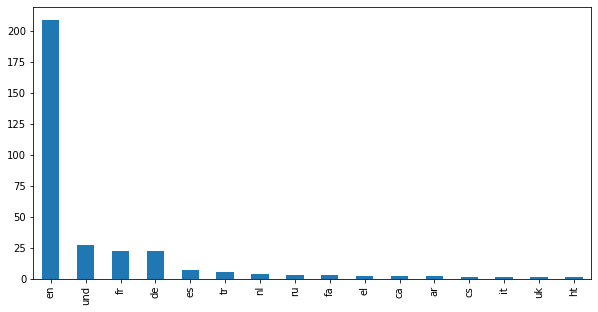

In [115]:
plt.figure(figsize=(10,5))
df['lang'].value_counts().plot.bar()

In [116]:
df_en = df[df.lang == 'en'].drop('lang', axis=1)
df_en.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,displayname,description,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location
2,snscrape.modules.twitter.Tweet,https://twitter.com/MndyHarpoons/status/1523781752644587520,2022-05-09 21:47:34+00:00,"@CuateBoliviano @ExmoorOn @richimedhurst Yup Russia also killed statistically more people under stalin, their own people then the holocaust, in fact when Stalin died he was about to engineer a holocaust of his own on jews in Russia\n\nthis guy is a russian agent throwing half historical facts #ukraine","@CuateBoliviano @ExmoorOn @richimedhurst Yup Russia also killed statistically more people under stalin, their own people then the holocaust, in fact when Stalin died he was about to engineer a holocaust of his own on jews in Russia\n\nthis guy is a russian agent throwing half historical facts #ukraine",1523781752644587520,"{'_type': 'snscrape.modules.twitter.User', 'username': 'MndyHarpoons', 'id': 1496058035814424578, 'displayname': 'OneHairyToe', 'description': 'alt of alts 31 he/him From Cuba to America Social worker', 'rawDescription': 'alt of alts 31 he/him From Cuba to America Social worker', 'descriptionUrls': None, 'verified': False, 'created': '2022-02-22T09:44:15+00:00', 'followersCount': 40, 'friendsCount': 85, 'statusesCount': 1521, 'favouritesCount': 2751, 'listedCount': 0, 'mediaCount': 110, 'location': 'florida', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1518765790555738123/x1KrAJIL_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1496058035814424578/1651117904', 'label': None, 'url': 'https://twitter.com/MndyHarpoons'}",0,0,0,...,OneHairyToe,alt of alts\n31\nhe/him\nFrom Cuba to America\n\nSocial worker,2022-02-22T09:44:15+00:00,110,0,2751,1521,85,40,florida
3,snscrape.modules.twitter.Tweet,https://twitter.com/PLoyalties/status/1523781746382503936,2022-05-09 21:47:33+00:00,The other country the #Ukraine shares the most in common with is .... 😉 #Think32 https://t.co/qM9gP9lAVP,The other country the #Ukraine shares the most in common with is .... 😉 #Think32 twitter.com/ardevwriter/st…,1523781746382503936,"{'_type': 'snscrape.modules.twitter.User', 'username': 'PLoyalties', 'id': 1004655656165691392, 'displayname': 'I’m an inconsistent hypocrite', 'description': '#savetheNHS #Bipolar #Bi #Vegan #Labour #IndyRefNow Loath Tories , homophobic religions #freeKurdistan #ArmenianGenocide Retweets not endorsements', 'rawDescription': '#savetheNHS #Bipolar #Bi #Vegan #Labour #IndyRefNow Loath Tories , homophobic religions #freeKurdistan #ArmenianGenocide Retweets not endorsements', 'descriptionUrls': None, 'verified': False, 'created': '2018-06-07T09:25:48+00:00', 'followersCount': 1779, 'friendsCount': 5002, 'statusesCount': 58773, 'favouritesCount': 26079, 'listedCount': 7, 'mediaCount': 6316, 'location': 'South East', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1480926900428095491/KCP6oSpE_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1004655656165691392/1647098318', 'label': None, 'url': 'https://twitter.com/PLoyalties'}",0,0,0,...,I’m an inconsistent hypocrite,"#savetheNHS #Bipolar #Bi #Vegan #Labour #IndyRefNow Loath Tories , homophobic religions #freeKurdistan #ArmenianGenocide Retweets not endorsements",2018-06-07T09:25:48+00:00,6316,7,26079,58773,5002,1779,South East
4,snscrape.modules.twitter.Tweet,https://twitter.com/Aquarian_Diary/status/1523781745937584133,2022-05-09 21:47:33+00:00,America’s Gulf ‘allies’ are now Putin’s enablers\n\n@joshrogin #Ukraine\n\nhttps://t.co/1b4cxwvdrf,America’s Gulf ‘allies’ are now Putin’s enablers\n\n@joshrogin #Ukraine\n\nwashingtonpost.com/opinions/2022/…,1523781745937584133,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Aquarian_Diary', 'id': 1440048239432978

<AxesSubplot:>

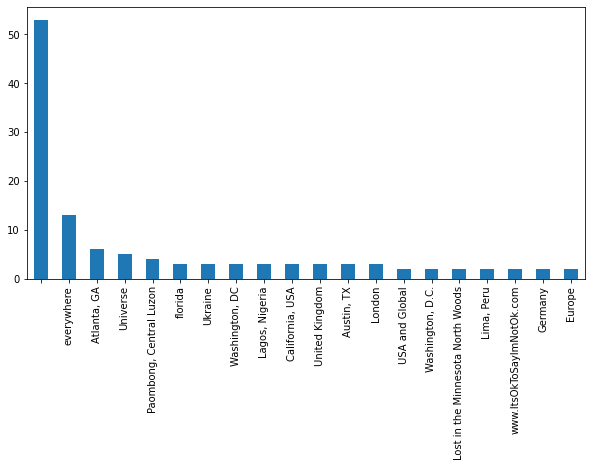

In [118]:
plt.figure(figsize=(10,5))
df_en['location'].value_counts().iloc[:20].plot.bar()

# netoyage données

In [119]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df_en["content"] = df_en["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# wordcloud de tous les tweets

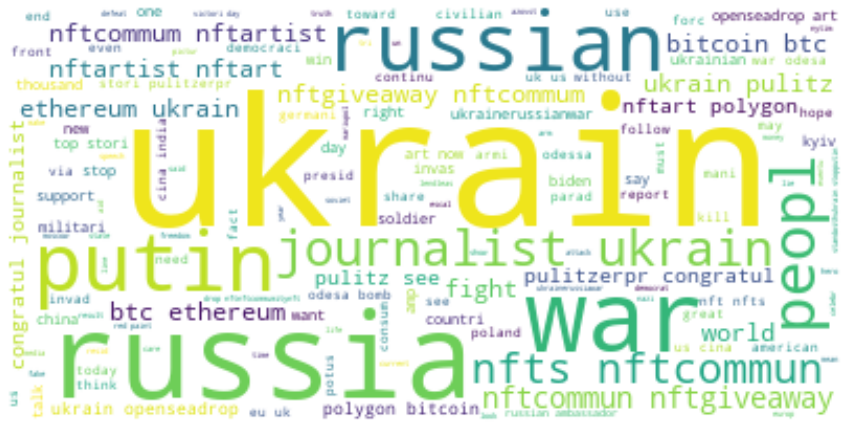

In [120]:
text = " ".join(i for i in df_en.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# analyse des sentiments 

In [121]:
from afinn import Afinn

In [122]:
afinn = Afinn()
aff=[]
for sentence in df_en['content']:
    vs=afinn.score(sentence)
    aff.append(vs)
df_en['sentiment']=aff

In [123]:
# creation de la colonne label (positif , neutre ou negatif)
THRESHOLD = 0.2
conditions = [
    (df_en['sentiment'] <= -THRESHOLD), 
    (df_en['sentiment'] > -THRESHOLD) & (df_en['sentiment'] < THRESHOLD),
    (df_en['sentiment'] >= THRESHOLD)
]

values = ["neg","neu", "pos"]
df_en['label'] = np.select(conditions, values)

df_en.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
2,snscrape.modules.twitter.Tweet,https://twitter.com/MndyHarpoons/status/1523781752644587520,2022-05-09 21:47:34+00:00,cuateboliviano exmooron richimedhurst yup russia also kill statist peopl stalin peopl holocaust fact stalin die engin holocaust jew russiathi guy russian agent throw half histor fact ukrain,"@CuateBoliviano @ExmoorOn @richimedhurst Yup Russia also killed statistically more people under stalin, their own people then the holocaust, in fact when Stalin died he was about to engineer a holocaust of his own on jews in Russia\n\nthis guy is a russian agent throwing half historical facts #ukraine",1523781752644587520,"{'_type': 'snscrape.modules.twitter.User', 'username': 'MndyHarpoons', 'id': 1496058035814424578, 'displayname': 'OneHairyToe', 'description': 'alt of alts 31 he/him From Cuba to America Social worker', 'rawDescription': 'alt of alts 31 he/him From Cuba to America Social worker', 'descriptionUrls': None, 'verified': False, 'created': '2022-02-22T09:44:15+00:00', 'followersCount': 40, 'friendsCount': 85, 'statusesCount': 1521, 'favouritesCount': 2751, 'listedCount': 0, 'mediaCount': 110, 'location': 'florida', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1518765790555738123/x1KrAJIL_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1496058035814424578/1651117904', 'label': None, 'url': 'https://twitter.com/MndyHarpoons'}",0,0,0,...,2022-02-22T09:44:15+00:00,110,0,2751,1521,85,40,florida,-6.0,neg
3,snscrape.modules.twitter.Tweet,https://twitter.com/PLoyalties/status/1523781746382503936,2022-05-09 21:47:33+00:00,countri ukrain share common 😉,The other country the #Ukraine shares the most in common with is .... 😉 #Think32 twitter.com/ardevwriter/st…,1523781746382503936,"{'_type': 'snscrape.modules.twitter.User', 'username': 'PLoyalties', 'id': 1004655656165691392, 'displayname': 'I’m an inconsistent hypocrite', 'description': '#savetheNHS #Bipolar #Bi #Vegan #Labour #IndyRefNow Loath Tories , homophobic religions #freeKurdistan #ArmenianGenocide Retweets not endorsements', 'rawDescription': '#savetheNHS #Bipolar #Bi #Vegan #Labour #IndyRefNow Loath Tories , homophobic religions #freeKurdistan #ArmenianGenocide Retweets not endorsements', 'descriptionUrls': None, 'verified': False, 'created': '2018-06-07T09:25:48+00:00', 'followersCount': 1779, 'friendsCount': 5002, 'statusesCount': 58773, 'favouritesCount': 26079, 'listedCount': 7, 'mediaCount': 6316, 'location': 'South East', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1480926900428095491/KCP6oSpE_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1004655656165691392/1647098318', 'label': None, 'url': 'https://twitter.com/PLoyalties'}",0,0,0,...,2018-06-07T09:25:48+00:00,6316,7,26079,58773,5002,1779,South East,1.0,pos
4,snscrape.modules.twitter.Tweet,https://twitter.com/Aquarian_Diary/status/1523781745937584133,2022-05-09 21:47:33+00:00,america gulf alli putin enablersjoshrogin ukrain,America’s Gulf ‘allies’ are now Putin’s enablers\n\n@joshrogin #Ukraine\n\nwashingtonpost.com/opinions/2022/…,1523781745937584133,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Aquarian_Diary', 'id': 1440048239432978437, 'displayname': 'Aquarian Diary 🇺🇦', 'description': 'What I am reading that I find noteworthy. A journal about the emerging Age of Aquarius and global spiritual awakening, spirituality, environment and astrology.', 'rawDescription': 'What I am reading that I find noteworthy. A journal about the emerging Age of Aquarius and global spiritual awakening, spirituality, environment and astrology.', 'descriptionUrls': None, 'verified': False, 'created': '2021-09-20T20:21:49+00:00', '

In [124]:
df_en.to_csv('sentiments_Uk.csv')

<AxesSubplot:xlabel='label', ylabel='Count'>

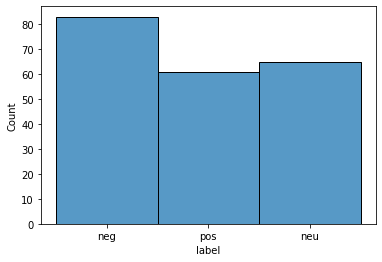

In [125]:
# diagrame en bar des types d'avis
sns.histplot(df_en["label"])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

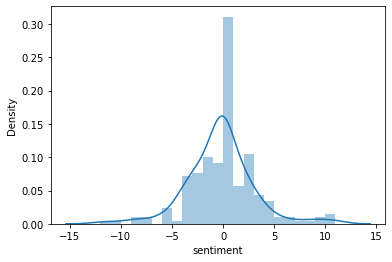

In [126]:
# distribution des sentiments 
sns.distplot(df_en['sentiment'])

# tweet le plus retweeté 

In [130]:
sorted_tweets = df_en.sort_values(by = 'retweetCount', ascending=False)
most_retweeted = sorted_tweets.iloc[0]
phrase=df.content[(df['date']==most_retweeted['date']) & (df['username']==most_retweeted['username'])]
phrase = " ".join(phrase)
print('*'+'-'*30+'Tweet'+'-'*30+'*')
print(phrase)
print('*'+'-'*30+'Details du Tweet'+'-'*30+'*')
print(most_retweeted)

*------------------------------Tweet------------------------------*
We are LIVE with report from #Odesa with @OscDomesticated after Russian attack on residential areas in Odesa.

 #UKRAINE #WalterReport https://t.co/Vyhd4QLQcL
*------------------------------Details du Tweet------------------------------*
_type               snscrape.modules.twitter.Tweet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

# top 10 Tweet Retweeté 

In [131]:
sorted_tweets.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
262,snscrape.modules.twitter.Tweet,https://twitter.com/walter_report/status/1523778703763075073,2022-05-09 21:35:28+00:00,live report odesa oscdomest russian attack residenti area odesa ukrain walterreport,We are LIVE with report from #Odesa with @OscDomesticated after Russian attack on residential areas in Odesa.\n\n #UKRAINE #WalterReport twitter.com/i/spaces/1YqJD…,1523778703763075073,"{'_type': 'snscrape.modules.twitter.User', 'username': 'walter_report', 'id': 1513277611941629956, 'displayname': 'Walter Report', 'description': 'Live news about the situation on the ground #walterreport. Since Russia invaded Ukraine on February 24th, we've been streaming live as a #spaceshost 24/7.', 'rawDescription': 'Live news about the situation on the ground #walterreport. Since Russia invaded Ukraine on February 24th, we've been streaming live as a #spaceshost 24/7.', 'descriptionUrls': None, 'verified': False, 'created': '2022-04-10T22:08:10+00:00', 'followersCount': 7811, 'friendsCount': 144, 'statusesCount': 960, 'favouritesCount': 1236, 'listedCount': 103, 'mediaCount': 49, 'location': '', 'protected': False, 'linkUrl': 'https://www.mriyaaid.org/', 'linkTcourl': 'https://t.co/u1f4fDNfHF', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1514655733828100122/LwVB-QHC_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1513277611941629956/1649629406', 'label': None, 'url': 'https://twitter.com/walter_report'}",0,6,9,...,2022-04-10T22:08:10+00:00,49,103,1236,960,144,7811,,-1.0,neg
81,snscrape.modules.twitter.Tweet,https://twitter.com/timand2037/status/1523780797177954304,2022-05-09 21:43:47+00:00,ukrain anoth ralli women complain husband thrown front line without prepar ammunit like cannon fodder nato headlin enough,"In #Ukraine, another rally of women who complain that their husbands are thrown into the front line without preparation, ammunition, just like cannon fodder. #NATO headlines are not enough. https://t.co/y36YpEyBFg",1523780797177954304,"{'_type': 'snscrape.modules.twitter.User', 'username': 'timand2037', 'id': 56575418, 'displayname': 'tim anderson', 'description': 'Writer, internationalist, academic. Director of the Centre for Counter Hegemonic Studies. Former political prisoner. Comment welcome but trolls will be blocked.', 'rawDescription': 'Writer, internationalist, academic. Director of the Centre for Counter Hegemonic Studies. Former political prisoner. Comment welcome but trolls will be blocked.', 'descriptionUrls': None, 'verified': False, 'created': '2009-07-14T02:18:31+00:00', 'followersCount': 70721, 'friendsCount': 1461, 'statusesCount': 19593, 'favouritesCount': 29921, 'listedCount': 501, 'mediaCount': 7978, 'location': 'Sydney, Australia.', 'protected': False, 'linkUrl': 'https://counter-hegemonic-studies.site', 'linkTcourl': 'https://t.co/kud6aQQcVA', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1370173793490989057/mzp49Uj3_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/56575418/1649227314', 'label': None, 'url': 'https://twitter.com/timand2037'}",0,6,19,...,2009-07-14T02:18:31+00:00,7978,501,29921,19593,1461,70721,"Sydney, Australia.",0.0,neu
251,snscrape.modules.twitter.Tweet,https://twitter.com/franceintheus/status/1523778821698523136,2022-05-09 21:35:56+00:00,europeday 🇪🇺🇫🇷 latoureiffel illumin solidar ukrain 🇺🇦 peopl,"This #EuropeDay, under the #EU2022FR 🇪🇺🇫🇷, @LaTourEiffel is illuminated in solidarity with #Ukraine 🇺🇦 and its people. https://t.co/Y42P7EbPjk",1523778821698523136,"{'_type': 'snscrape.modules.twitter.User', 'username': 'franceintheus', 'id': 43914724, 'displayname': 'French Embassy U.S.', 'description': '🇫🇷 Official Twitter of the Embassy of France in the United States. Follow Ambassador @Ph_Etienne. #EU2022FR 🇫🇷🇪🇺', 'rawDescript

# wordcloud des tweets negatif

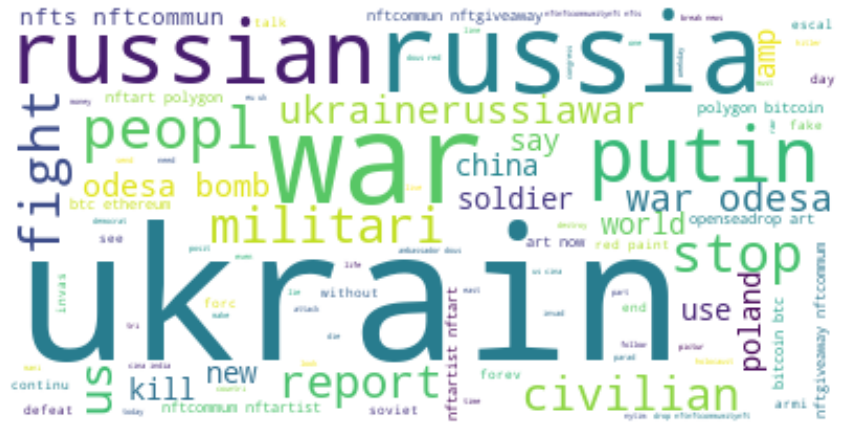

In [132]:
negative =' '.join([i for i in df_en['content'][df_en['sentiment'] < 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets positifs

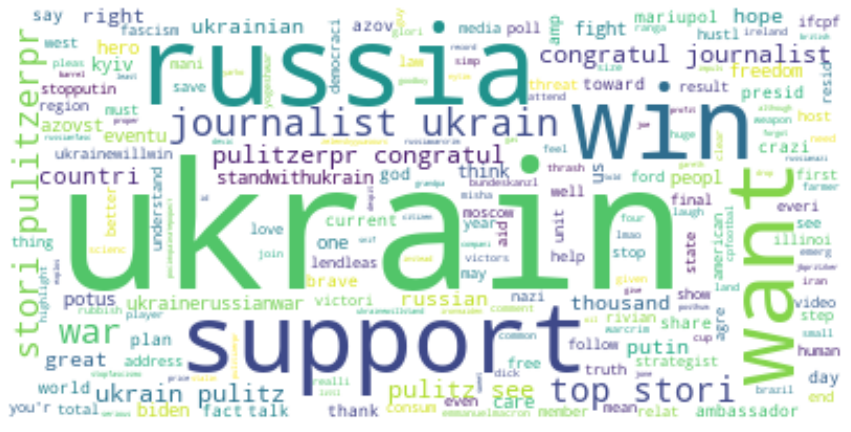

In [133]:
positif =' '.join([i for i in df_en['content'][df_en['sentiment'] > 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positif)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets neutres

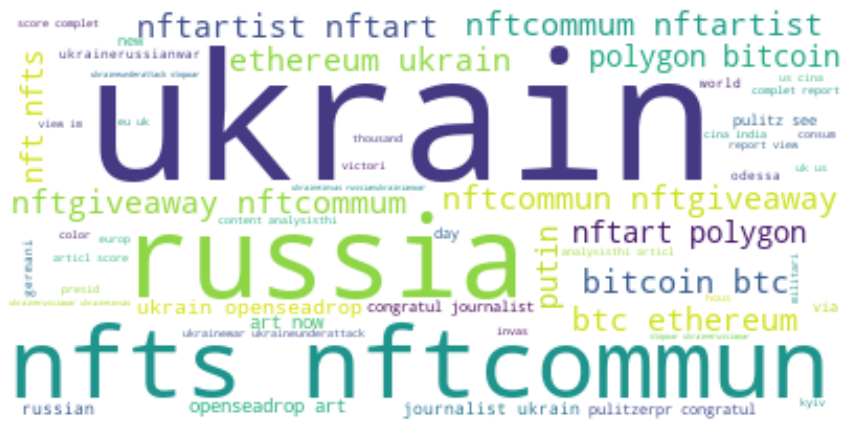

In [134]:
neutre =' '.join([i for i in df_en['content'][df_en['sentiment'] == 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neutre)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyse Hashtags

In [135]:
hashtags = [item for l in df['hashtags'].dropna() for item in l]
hashtags

hashtags_Positifs=[item for l in df_en['hashtags'][df_en['sentiment']>0].dropna() for item in l]
hashtags_Negatifs=[item for l in df_en['hashtags'][df_en['sentiment']<0].dropna() for item in l]

In [136]:
topXItem = 10
from collections import Counter

x_hashtags = Counter(hashtags)
x_hashtags_Positifs = Counter(hashtags_Positifs)
x_hashtags_Negatifs = Counter(hashtags_Negatifs)

topXItemList_hashtags = x_hashtags.most_common(topXItem)
topXItemList_hashtags_Positifs = x_hashtags_Positifs.most_common(topXItem)
topXItemList_hashtags_Negatifs = x_hashtags_Negatifs.most_common(topXItem)

<AxesSubplot:xlabel='Hashtag'>

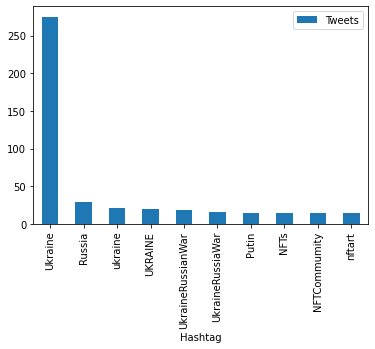

In [137]:
df_hash = pd.DataFrame(topXItemList_hashtags)
df_hash.columns =['Hashtag','Tweets']
df_hash.plot.bar(x='Hashtag', y='Tweets', rot=90)


## Hashtag positifs

<AxesSubplot:xlabel='Hashtag'>

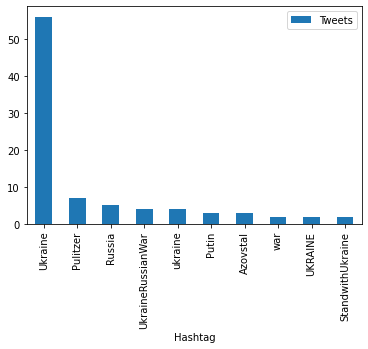

In [138]:
df_hash_positif = pd.DataFrame(topXItemList_hashtags_Positifs)
df_hash_positif.columns =['Hashtag','Tweets']
df_hash_positif.plot.bar(x='Hashtag', y='Tweets', rot=90)


## Hashtag negatifs

<AxesSubplot:xlabel='Hashtag'>

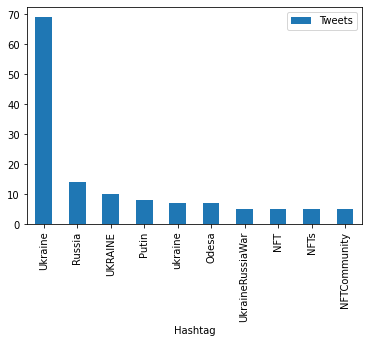

In [139]:
df_hash_negatifs = pd.DataFrame(topXItemList_hashtags_Negatifs)
df_hash_negatifs.columns =['Hashtag','Tweets']
df_hash_negatifs.plot.bar(x='Hashtag', y='Tweets', rot=90)


# scrapper les tweet de Biden, poutin, zelensky et macron

In [140]:
queryJB ="(from:POTUS) since:2022-02-01"
queryVP ="(from:KremlinRussia_E) since:2022-02-01"
queryEM ="(from:EmmanuelMacron) since:2022-02-01"
queryVZ ="(from:ZelenskyyUa) since:2022-02-01"
query=[queryJB,queryVP,queryEM,queryVZ]

df_POTUS=[]
df_KremlinRussia_E=[]
df_EmmanuelMacron=[]
df_ZelenskyyUa=[]
presidents=[df_POTUS,df_KremlinRussia_E,df_EmmanuelMacron,df_ZelenskyyUa]

limits =1000
president=0

for query in query:
    tweets = []
    for tweet in scpt.TwitterSearchScraper(query).get_items():

        if len(tweets)==limits :
            break
        else :
            tweets.append([tweet.date, tweet.user.username,tweet.user.displayname,tweet.user.description,tweet.user.followersCount,tweet.user.friendsCount,
                        tweet.user.statusesCount,tweet.user.favouritesCount,tweet.user.listedCount,tweet.user.mediaCount,tweet.user.location,tweet.content,
                        tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.lang,tweet.hashtags])
        
    presidents[president] = pd.DataFrame(tweets, columns = ['Date','Username','displayname','UserDescription','followersCount','friendsCount','statusesCount','favouritesCount',
                                            'listedCount','mediaCount','location','content','replyCount','retweetCount','likeCount','quoteCount','lang','hashtags'])
    president=president+1

df_POTUS=presidents[0]
df_KremlinRussia_E=presidents[1]
df_EmmanuelMacron=presidents[2]
df_ZelenskyyUa= presidents[3]

# Evolution du nombre de tweets/jour des presidents

In [141]:
# dateTime to date 
for df in presidents:
    df['Date'] = pd.to_datetime(df['Date']).dt.date

In [142]:
df_count_tweet_POTUS=0
df_count_tweet_KremlinRussia_E=0
df_count_tweet_EmmanuelMacron=0
df_count_tweet_ZelenskyyUa=0
df_count_tweets=[df_count_tweet_POTUS,df_count_tweet_KremlinRussia_E,df_count_tweet_EmmanuelMacron,df_count_tweet_ZelenskyyUa]
i=0
for df_count_tweet in df_count_tweets:
    df_count_tweets[i] = (presidents[i]
          .value_counts('Date',sort = False)
          .rename_axis('Date')
          .reset_index(name='tweet_count'))
    i+=1

df_count_tweet_POTUS=df_count_tweets[0]
df_count_tweet_KremlinRussia_E=df_count_tweets[1]
df_count_tweet_EmmanuelMacron=df_count_tweets[2]
df_count_tweet_ZelenskyyUa=df_count_tweets[3]

In [143]:
# # definition des x et y 
# dates = df_count_tweet['Date']
# y = df_count_tweet['tweet_count']

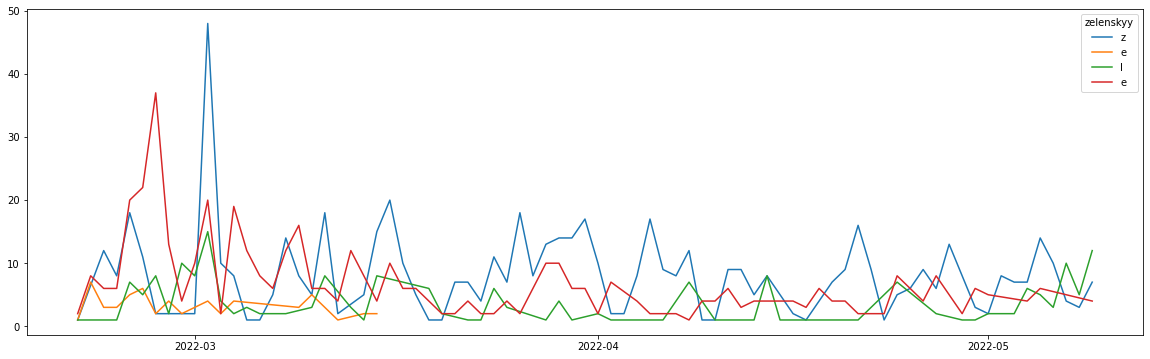

In [144]:
nom_presidents=['biden','poutin','macron','zelenskyy']
i=0
fig, ax = plt.subplots(figsize=(20, 6))
for df in presidents:
    half_year_locator = mdates.MonthLocator(interval=1)
    year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
    ax.plot(df_count_tweets[i]['Date'], df_count_tweets[i]['tweet_count'])
    legend = plt.legend(nom_presidents[i], title = nom_presidents[i])
    i+=1

In [ ]:
#snscrape --jsonl --progress --max-results 500 --since 2021-01-01 twitter-search "vaccine until:2021-05-31" > text-query-vaccine_tweets.json